In [1]:
# Compare the parameters/energies/freq dist found from the 2008 values to new fit v5.2+bpow
# 
# 22-Jul-2024   IGH

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sunpy.io.special import read_genx
from astropy.time import Time
from scipy import constants
import scipy.special as sc

import warnings
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Ubuntu",'mathtext.default':"regular"})

In [3]:
plt.rc('font', family='sans-serif', weight='normal', size=18)
# Need kb for later calculations
k = constants.k

In [4]:
# Load in the new fit -  v5.2 and bpow
b05=read_genx('wee_2024_vth52_bpow.genx')

In [5]:
# Load in all the parameters we need

tmk_b05=np.array([r["OSX_P"][1] for r in b05["SAVEGEN0"]])
em_b05=np.array([r["OSX_P"][0]*1e49 for r in b05["SAVEGEN0"]])
gam_b05=np.array([r["OSX_P"][6] for r in b05["SAVEGEN0"]])
eb_b05=np.array([r["OSX_P"][5] for r in b05["SAVEGEN0"]])
ip_b05=np.array([r["OSX_P"][3] for r in b05["SAVEGEN0"]])

print(f'Num flares bpow v5.2: {np.count_nonzero(tmk_b05):.0f}')


Num flares bpow v5.2: 24799


In [16]:
# Load in the 2008 ones
# Think this correct but issue with Volumes and hence thermal energies ?
res=read_genx('../wee_2008/wee_all_v2.genx')
idgdth=res["SAVEGEN0"]["IDGDTH"]
idgdnn=res["SAVEGEN0"]["IDGDNN"]
idgsgdth=res["SAVEGEN0"]["IDGSGDTH"]
idgsgdnn=res["SAVEGEN0"]["IDGSGDNN"]
tmk=res["SAVEGEN0"]["TMK"]
em=res["SAVEGEN0"]["EM"]
norm=res["SAVEGEN0"]["NORM"]
eb=res["SAVEGEN0"]["EB"]
g2=res["SAVEGEN0"]["G2"]
vol=res["SAVEGEN0"]["VOL"]
wt=res["SAVEGEN0"]["ENG_TH"]
wn=res["SAVEGEN0"]["ENG_NN_EC"]

In [23]:
# Now calculate the thermal and non-thermal energy from the new fits

# Thermal energy calc using standard formula
wt_b05 = 3*np.sqrt(em_b05*vol)*k*(tmk_b05*1e6)*1e7
wtv=3*np.sqrt(em*vol)*k*(tmk*1e6)*1e7

# For Non-thermal power*16 use the approx to get Ec then use standard formula for photon spec fit
def ebtoec(eb,gam):
    return 0.15*gam+(1.86-0.04*gam)*eb-3.39
ecg_b05=ebtoec(eb_b05,gam_b05)
feb=ip_b05*(eb_b05/50.)**(-1.5)
f1=feb*eb_b05**gam_b05
betas=sc.beta(gam_b05-0.5,1.5)
wn_b05=16*9.5e24*gam_b05**2*(gam_b05-1)*f1*ecg_b05**(1-gam_b05)*betas


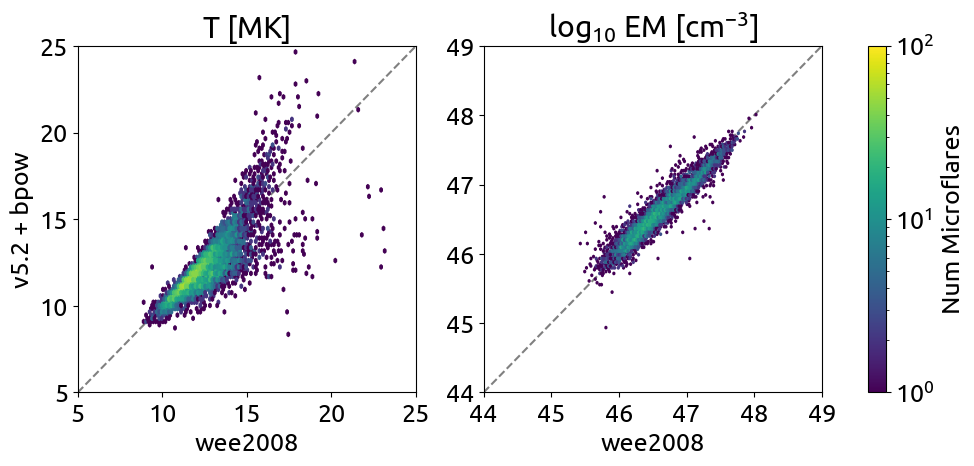

In [8]:
# Plot comparison of all the parameters
gs=100
vmax=100
tmkr=[5,25]
emr=[44,49]
fig,axs=plt.subplots(1,2,figsize=(12,4.5))
hex07=axs[0].hexbin(tmk[idgsgdth],tmk_b05[idgsgdth],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('wee2008')
axs[0].set_ylabel('v5.2 + bpow')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(em[idgsgdth]),np.log10(em_b05[idgsgdth]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('wee2008')
axs[1].plot(emr,emr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
fig.colorbar(hex09, ax=axs.ravel().tolist(),label='Num Microflares')
plt.show()

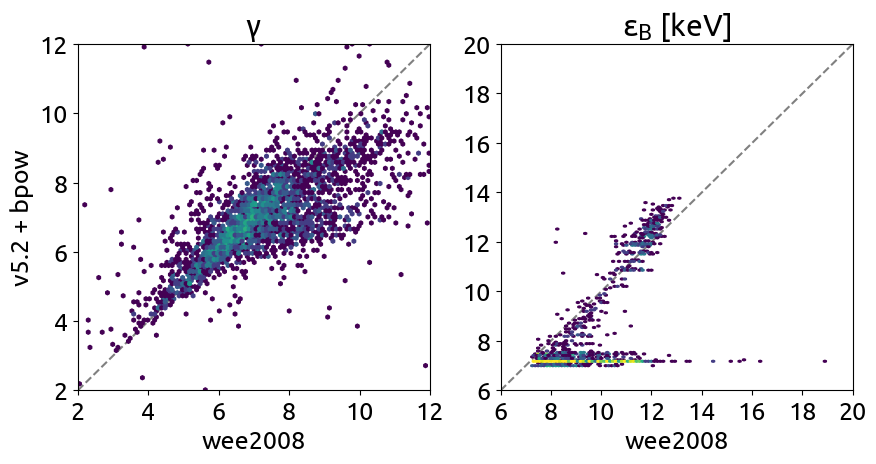

In [9]:
gs=100
vmax=50
gamr=[2,12]
ebr=[6,20]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(g2[idgsgdnn],gam_b05[idgsgdnn],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('$\gamma$ ')
axs[0].set_xlim(gamr)
axs[0].set_ylim(gamr)
axs[0].set_xlabel('wee2008')
axs[0].set_ylabel('v5.2 + bpow')
axs[0].plot(gamr,gamr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=7)
hex09=axs[1].hexbin(eb[idgsgdnn],eb_b05[idgsgdnn],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('$\epsilon_\mathrm{B}$ [keV]')
axs[1].set_xlim(ebr)
axs[1].set_ylim(ebr)
axs[1].set_xlabel('wee2008')
axs[1].plot(ebr,ebr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=8)
plt.show()

In [43]:
maxa=32
mina=22.
nbs=70

# Info from idl files
mnfrac=0.50053798#*idgsgdth.size/wt_b05.size
t = Time(['2002-03-01T00:00:00', '2007-03-01T00:00:00'], format='isot', scale='utc')
tdiff=(t[1]-t[0]).sec
factor=2*3.14*(6.955e10)**2*tdiff*mnfrac/1e50

hth_b05, xat=np.histogram(np.log10(wt_b05[idgsgdth]),bins=nbs,range=(mina,maxa))
ewidt=np.array([10**(xat[i+1])-10**(xat[i]) for i in range(nbs)])
midsat=np.array([0.5*(10**(xat[i+1])+10**(xat[i])) for i in range(nbs)])
fhth_b05=hth_b05/(ewidt*factor)

hth_wt, xat=np.histogram(np.log10(wt[idgsgdth]),bins=nbs,range=(mina,maxa))
fhth_wt=hth_wt/(ewidt*factor)

hth_wtv, xat=np.histogram(np.log10(wtv[idgsgdth]),bins=nbs,range=(mina,maxa))
fhth_wtv=hth_wtv/(ewidt*factor)

hnt_b05, xat=np.histogram(np.log10(wn_b05[idgsgdth]),bins=nbs,range=(mina,maxa))
fhnt_b05=hnt_b05/(ewidt*factor)



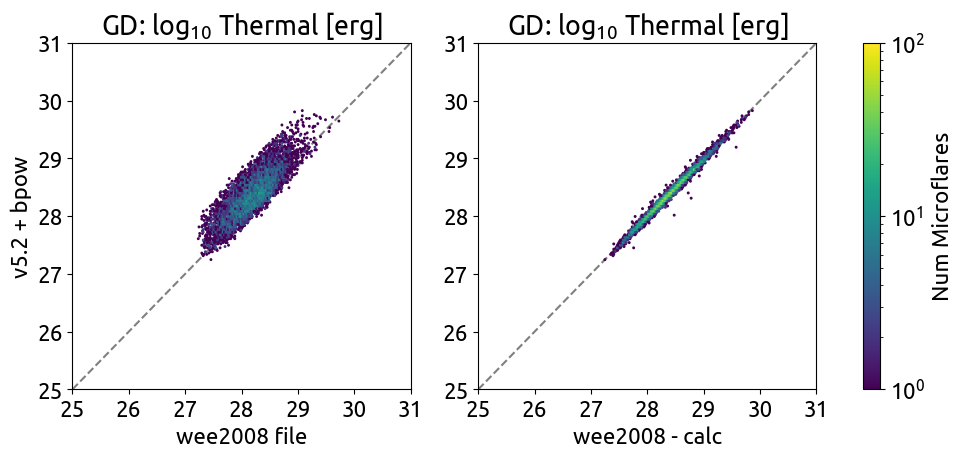

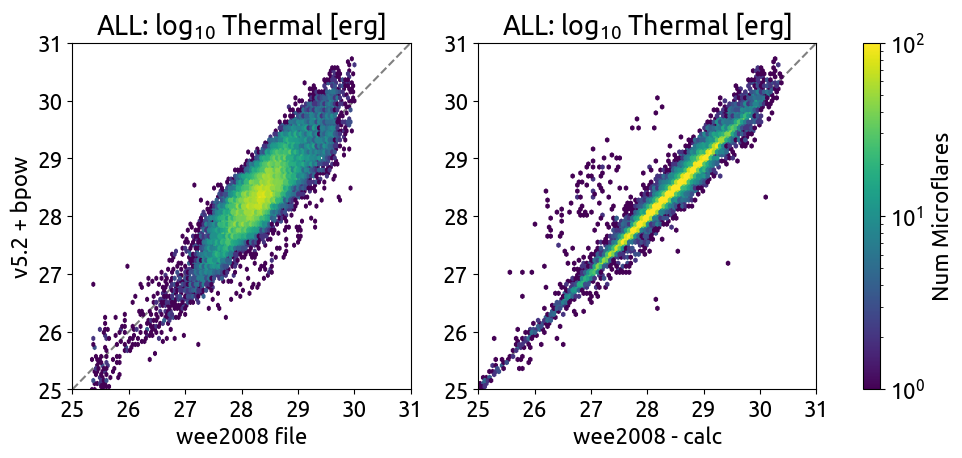

In [28]:
# Plot comparison of all the parameters
gs=100
vmax=100
engr=[25,31]
fig,axs=plt.subplots(1,2,figsize=(12,4.5))
hex07=axs[0].hexbin(np.log10(wt[idgsgdth]),np.log10(wt_b05[idgsgdth]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('GD: log$_{10}$ Thermal [erg]')
axs[0].set_xlim(engr)
axs[0].set_ylim(engr)
axs[0].set_xlabel('wee2008 file')
axs[0].set_ylabel('v5.2 + bpow')
axs[0].plot(engr,engr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(wtv[idgsgdth]),np.log10(wt_b05[idgsgdth]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('GD: log$_{10}$ Thermal [erg]')
axs[1].set_xlim(engr)
axs[1].set_ylim(engr)
axs[1].set_xlabel('wee2008 - calc')
axs[1].plot(engr,engr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
fig.colorbar(hex09, ax=axs.ravel().tolist(),label='Num Microflares')
plt.show()

fig,axs=plt.subplots(1,2,figsize=(12,4.5))
hex07=axs[0].hexbin(np.log10(wt),np.log10(wt_b05),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('ALL: log$_{10}$ Thermal [erg]')
axs[0].set_xlim(engr)
axs[0].set_ylim(engr)
axs[0].set_xlabel('wee2008 file')
axs[0].set_ylabel('v5.2 + bpow')
axs[0].plot(engr,engr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(wtv),np.log10(wt_b05),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('ALL: log$_{10}$ Thermal [erg]')
axs[1].set_xlim(engr)
axs[1].set_ylim(engr)
axs[1].set_xlabel('wee2008 - calc')
axs[1].plot(engr,engr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
fig.colorbar(hex09, ax=axs.ravel().tolist(),label='Num Microflares')
plt.show()

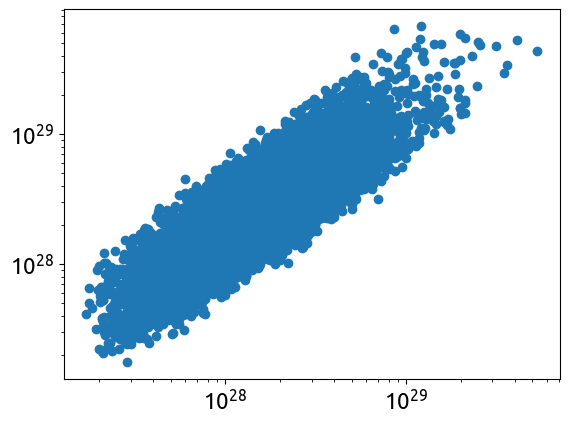

In [22]:
plt.scatter(wt[idgsgdth],wt_b05[idgsgdth])
plt.yscale('log')
plt.xscale('log')
plt.show()

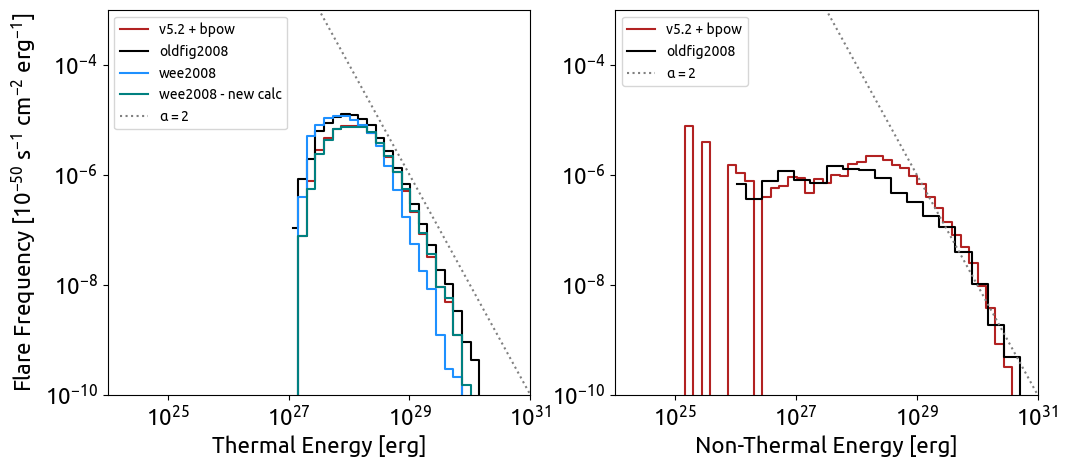

In [46]:
htmid=np.array([1.1947469e27,1.6600975e27,2.3066995e27,3.2051445e27,4.4535393e27,\
                6.1881766e27,8.5984329e27,1.1947469e28,1.6600976e28,2.3066994e28,\
                3.2051445e28,4.4535396e28,6.1881768e28,8.5984329e28,1.1947499e29,\
                1.6601007e29,2.3066994e29,3.2051442e29,4.4535395e29,6.1881769e29,\
                8.5984335e29,1.1947500e30,1.6601006e30])
hth=np.array([1.0697291e-07,8.4684353e-07,1.9392182e-06,6.1407708e-06,8.6378432e-06,1.1421209e-05,\
            1.2723433e-05,1.1927478e-05,1.0462365e-05,7.9452557e-06,4.5537399e-06,2.7319685e-06,\
            1.3073467e-06,6.6589909e-07,2.9203150e-07,1.2779781e-07,5.2081876e-08,\
            1.8342562e-08,1.0330972e-08,3.3045092e-09,8.9182926e-10,4.2788493e-10,7.6986638e-11])

hnmid=np.array([1.0474995792491859e+26,1.9356219473014713e+26,3.5767387377478528e+26,6.6092761636338248e+26,\
                1.2212950011183544e+27,2.2567697926797035e+27,4.1701717377765904e+27,7.7058512476371085e+27,\
                1.4239256122907321e+28,2.6312007384768302e+28,4.8620639072734493e+28,8.9843640938227603e+28,\
                1.6601755902389442e+29,3.0677552263495790e+29,5.6687510550860706e+29,1.0475000824227298e+30,\
                1.9356228770906325e+30,3.5767404558586210e+30,6.6092793384445617e+30,1.2212955877757108e+31])
hec=np.array([6.6801869543376520e-07,3.6151134955511727e-07,7.8255567845927342e-07,1.1646119992268643e-06,\
            8.0213955060764684e-07,7.1315355280571889e-07,1.4095088906992044e-06,1.2894668966119465e-06,\
            1.2285566330809610e-06,8.8824947326537598e-07,4.6774071179723770e-07,3.1621405121894089e-07,\
            1.7955522570863353e-07,1.0971521181423738e-07,3.9871044340815129e-08,1.0220681130562944e-08,\
            1.8798581146839845e-09,4.8909706409594613e-10,5.2936883627174645e-11,5.7295654663903265e-12])


xrl=[1e24,1e31]
yrl=[1e-10,1e-3]
plt.rc('font', family='sans-serif', weight='normal', size=16)

# Plot the thermal enegrgy frequency distribution
fig,axs=plt.subplots(1,2,figsize=(12,5))
axs[0].step(midsat,fhth_b05,where='mid',color='firebrick',label='v5.2 + bpow')
axs[0].step(htmid,hth,where='mid',color='black',label='oldfig2008')
axs[0].step(midsat,fhth_wt,where='mid',color='dodgerblue',label='wee2008')
axs[0].step(midsat,fhth_wtv,where='mid',color='teal',label='wee2008 - new calc')

# Example -2 line for comparison
xl=np.array([1e22,1e33])
axs[0].plot(xl,10**(52-2*np.log10(xl)),color='grey',ls='dotted',label=r'$\alpha=2$')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel('Thermal Energy [erg]')
axs[0].set_ylabel('Flare Frequency [10$^{-50}$ s$^{-1}$ cm$^{-2}$ erg$^{-1}$]')
axs[0].set_xlim(xrl)
axs[0].set_ylim(yrl)
axs[0].legend(loc=2,prop={'size': 10})

# #############################################
# Plot the non-thermal enegrgy frequency distribution
axs[1].step(midsat,fhnt_b05,where='mid',color='firebrick',label='v5.2 + bpow')
axs[1].step(hnmid,hec,where='mid',color='black',label='oldfig2008')
# Example -2 line for comparison
xl=np.array([1e22,1e33])
axs[1].plot(xl,10**(52-2*np.log10(xl)),color='grey',ls='dotted',label=r'$\alpha=2$')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('Non-Thermal Energy [erg]')
# axs[1].set_ylabel('Flare Frequency [10$^{-50}$ s$^{-1}$ cm$^{-2}$ erg$^{-1}$]')
axs[1].set_xlim(xrl)
axs[1].set_ylim(yrl)

axs[1].legend(loc=2,prop={'size': 10})
plt.show()

In [13]:
# - The discrepancy between the volumes and one used for the Wt given in the old file
# - The discrepancy between the frequency distribution of the Wt from the old plot 
#       (~/work_dbx/wee_2004/mfplot_engdist.pro) and ../wee_2008/old_freqdist.ipynb

In [14]:
# Calculate the freq distribution from the enegies in the old file
